<a href="https://colab.research.google.com/github/arunangshudutta/EE5121_assignment_2/blob/main/Prob_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pandas.read_csv("Data_Q2.csv")

In [18]:
data

,x1,x2,y
0,-0.763770,-0.012259,1
1,-0.769042,-0.030913,1
2,-0.838021,-0.005047,1
3,-0.388726,-0.007426,1
4,-0.508369,0.033678,1
...,...,...,...
395,0.424498,-0.019491,-1
396,0.694070,0.023532,-1
397,0.663057,-0.047523,-1
398,0.552560,-0.037331,-1


In [19]:

data = data.values
X = data[:,0:2]
y = data[:,2]

# Question 2 (b)

In [20]:
def logistic_objective(X, y, w):
    s = y * (X @ w)            # signed margin
    return np.sum(np.log(1 + np.exp(-s)))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_gd(X, y, lr=0.01, iters=1000):
    """
    X: shape (n_samples, n_features)
    y: labels in {-1, +1}
    """
    n, d = X.shape
    y_bin = (y + 1) / 2  # convert to {0,1}
    w = np.zeros(d)
    w_norm = []
    ob_val = []
    for i in range(iters):
        scores = X @ w
        p = sigmoid(scores)
        grad = X.T @ (p - y_bin)
        w -= lr * grad
        ob_val = np.append(ob_val, logistic_objective(X, y, w))
        w_norm = np.append(w_norm, np.linalg.norm(w))
    return w, ob_val, w_norm


N_iter = 100000
w, ob_val, w_norm = logistic_regression_gd(X, y, lr=0.01, iters=N_iter)
print("Learned weights:", w)

Learned weights: [-24.13901832   0.23594234]


/tmp/ipython-input-3547871386.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '$L( w_k )$ versus iteration $k$')

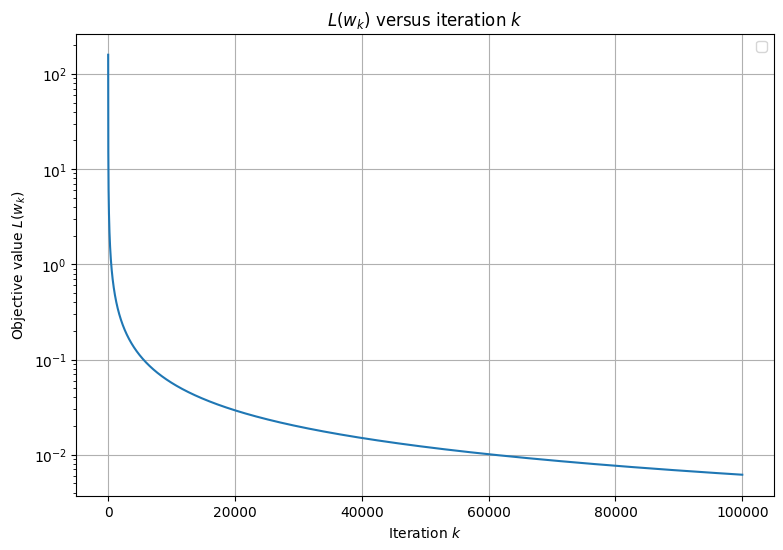

In [21]:
it = np.arange(N_iter)

plt.figure(figsize=(9,6))
plt.grid(True)
plt.semilogy(it, ob_val)
plt.ylabel("Objective value $L( w_k )$")
plt.xlabel("Iteration $k$")
plt.legend()
plt.title("$L( w_k )$ versus iteration $k$")

/tmp/ipython-input-4086747982.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '$|| w_k ||^2$ versus iteration $k$')

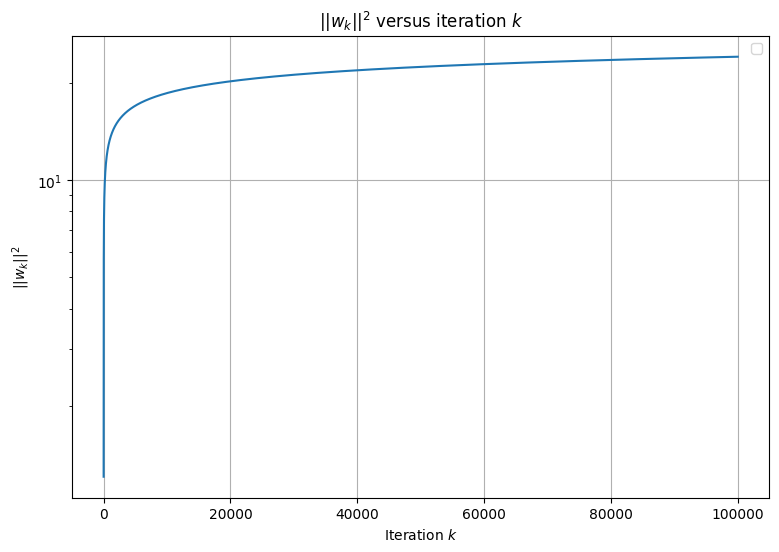

In [22]:
it = np.arange(N_iter)

plt.figure(figsize=(9,6))
plt.grid(True)
plt.semilogy(it, w_norm)
plt.ylabel("$|| w_k ||^2$")
plt.xlabel("Iteration $k$")
plt.legend()
plt.title("$|| w_k ||^2$ versus iteration $k$")

# Question 2 (d): Regularized logestic regression

In [23]:
def reg_logistic_regression_gd(X, y, lr=0.01, iters=1000, lam=1e-3):
    """
    X: shape (n_samples, n_features)
    y: labels in {-1, +1}
    """
    n, d = X.shape
    y_bin = (y + 1) / 2  # convert to {0,1}
    w = np.zeros(d)
    w_norm = []
    ob_val = []
    for i in range(iters):
        scores = X @ w
        p = sigmoid(scores)
        grad = X.T @ (p - y_bin) + lam * w
        w -= lr * grad
        ob_val = np.append(ob_val, logistic_objective(X, y, w))
        w_norm = np.append(w_norm, np.linalg.norm(w))
    return w, ob_val, w_norm

In [24]:
N_iter = 100000
w, ob_val, w_norm = reg_logistic_regression_gd(X, y, lr=0.01, iters=N_iter, lam=1e-3)
print("Learned weights:", w)

Learned weights: [-19.10583226   0.15760025]


/tmp/ipython-input-3547871386.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '$L( w_k )$ versus iteration $k$')

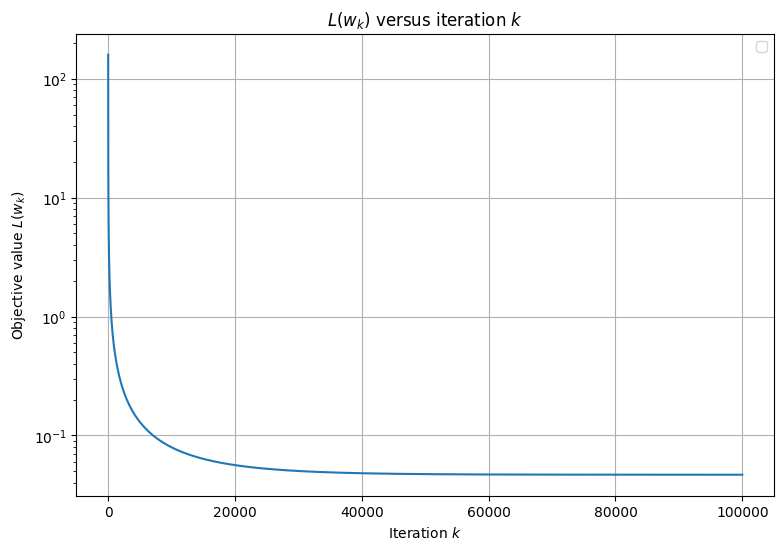

In [25]:
it = np.arange(N_iter)

plt.figure(figsize=(9,6))
plt.grid(True)
plt.semilogy(it, ob_val)
plt.ylabel("Objective value $L( w_k )$")
plt.xlabel("Iteration $k$")
plt.legend()
plt.title("$L( w_k )$ versus iteration $k$")

/tmp/ipython-input-4086747982.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '$|| w_k ||^2$ versus iteration $k$')

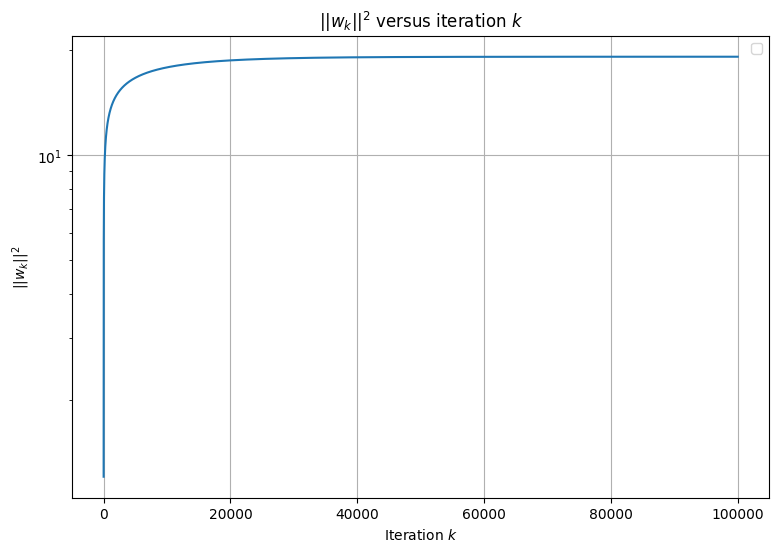

In [26]:
it = np.arange(N_iter)

plt.figure(figsize=(9,6))
plt.grid(True)
plt.semilogy(it, w_norm)
plt.ylabel("$|| w_k ||^2$")
plt.xlabel("Iteration $k$")
plt.legend()
plt.title("$|| w_k ||^2$ versus iteration $k$")